# Plot flux variables during 4-7 January 2022
- This script is used to plot daytime and nighttime flux variables during 4-7 July 2022.
- Simulations: GM_SLUCM, GM_CLMU, GM_CLMU_ALB, GM_CLMU_NOAH. 
    - GM_CLMU_ALB: increase albedo for pervious floor and impervious floor.
    - GM_CLMU_NOAH: match urban land cover and parameter from GM_SLUCM.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df_flux = pd.read_csv('./data_for_figure/fluxes.csv')
df_flux

,tag,model,location,season,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,...,PSFC,SWUP,LWUP,LWDOWN,netLW,NET,AHF,W10M,RH2M,GRD
0,01:30,wrf,sp,summer,0.000000,350.552872,2.946615,-0.038948,0.018000,0.98,...,101627.517578,0.000000,415.419271,343.541821,-71.877450,-71.877450,0.000000,0.645768,47.709363,-74.785118
1,01:30,wrf,sp,winter,0.000000,259.196594,-16.751774,0.162213,0.018000,0.98,...,100386.843750,0.000000,308.372868,254.012667,-54.360200,-54.360200,0.000000,1.489435,87.392488,-37.770640
2,01:30,wrf-ctsm,sp,summer,0.000000,347.329132,-5.905338,0.274503,0.300000,1.00,...,101632.197266,0.000000,409.267839,347.329132,-61.938707,-61.938707,0.000000,0.787207,52.112415,-56.307873
3,01:30,wrf-ctsm,sp,winter,0.000000,259.871821,1.757423,8.011357,0.300000,1.00,...,100385.346354,0.000000,317.648946,259.871821,-57.777125,-57.777125,5.087344,0.637025,85.576016,-62.458562
4,01:30,wrf-ctsm_road_albedo,sp,summer,0.000000,347.611404,-5.893152,0.275079,0.300000,1.00,...,101632.257812,0.000000,409.170493,347.611404,-61.559088,-61.559088,0.000000,0.788793,52.192223,-55.941015
5,01:30,wrf-ctsm_road_albedo,sp,winter,0.000000,259.725667,1.653929,7.993065,0.300000,1.00,...,100385.364583,0.000000,317.600760,259.725667,-57.875093,-57.875093,5.088002,0.638749,85.569523,-62.434086
6,01:30,wrf-ctsm_uniform_urban,sp,summer,0.000000,346.945801,1.525779,0.434242,0.300000,1.00,...,101632.505859,0.000000,413.200312,346.945801,-66.254511,-66.254511,0.000000,0.740698,49.906203,-68.214532
7,01:30,wrf-ctsm_uniform_urban,sp,winter,0.000000,257.953135,-15.398008,-1.721585,0.300000,1.00,...,100388.356771,0.000000,308.024963,257.953135,-50.071828,-50.071828,0.000000,1.050911,91.751025,-32.952234
8,13:30,wrf,sp,summer,759.691040,370.210983,279.180534,2.531059,0.154772,0.98,...,101321.359375,117.579169,533.919043,362.806771,-171.112272,470.999598,0.000000,3.768751,24.866259,189.288005
9,13:30,wrf,sp,winter,190.664368,244.446289,14.441679,3.621580,0.154772,0.98,...,100434.799479,29.509574,329.453963,239.557368,-89.896595,71.258198,0.000000,2.974778,71.320903,53.194939


In [3]:
df_flux[(df_flux['season']=='winter')&(df_flux['tag']=='13:30')]

,tag,model,location,season,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,...,PSFC,SWUP,LWUP,LWDOWN,netLW,NET,AHF,W10M,RH2M,GRD
9,13:30,wrf,sp,winter,190.664368,244.446289,14.441679,3.621580,0.154772,0.98,...,100434.799479,29.509574,329.453963,239.557368,-89.896595,71.258198,0.000000,2.974778,71.320903,53.194939
11,13:30,wrf-ctsm,sp,winter,190.736069,243.985952,29.142292,31.936752,0.153720,1.00,...,100437.500000,29.319945,334.917798,243.985952,-90.931846,70.484278,5.131047,2.041427,71.628255,14.536281
13,13:30,wrf-ctsm_road_albedo,sp,winter,190.646886,243.661814,28.440496,30.709464,0.166259,1.00,...,100437.390625,31.696696,334.777869,243.661814,-91.116054,67.834135,5.124968,2.019392,71.676409,13.809144
15,13:30,wrf-ctsm_uniform_urban,sp,winter,189.499873,244.834086,6.767841,10.456766,0.152406,1.00,...,100438.044271,28.880911,329.989434,244.834086,-85.155348,75.463614,0.000000,2.142364,76.216850,58.239006


In [6]:
vars_to_plot = ['SWDOWN', 'SWUP', 'LWDOWN', 'LWUP', 'NET', 'HFX', 'LH', 'GRD']
tag_list = ['13:30', '01:30']
xticks_list = [
    r'$SW_\mathrm{down}$',
    r'$SW_\mathrm{up}$',
    r'$LW_\mathrm{down}$',
    r'$LW_\mathrm{up}$',
    r'$R_\mathrm{n}$',
    r'$Q_\mathrm{h}$',
    r'$Q_\mathrm{le}$',
    r'$Q_\mathrm{s}$'
]
fontsize = 6
#location_list = ['City center', 'Main urban area']
season_list = ['summer', 'winter']
boundarywidth = 0.5
labelcolor = '#6b6b6b'
fontsize = 6
title_list = ['Summer 13:30', 'Summer 01:30', 'Winter 13:30', 'Winter 01:30']
labelsize = 6
padding = 4
linewidth = 0.5
labelfont = 6
pad = 2
xwidth = 0.5
length = 2
lc1 = '#1f78b4'
lc2 = '#e31a1c'
lc3 = '#1b9e77'
lc4 = '#7570b3'
handletextpad = 0.5
yoffset = 0.075
yloc = 0.925
xloc = 0.05
xloc_2 = xloc + 0.075 
xoffset = 0.185
lc_0 = [lc1, lc2, lc2, lc3, lc4]
alpha_list_0 = [1, 1, 0.7, 1, 1]
model_list = ['wrf', 'wrf-ctsm', 'wrf-ctsm_road_albedo', 'wrf-ctsm_uniform_urban']
label_list = ['GM_SLUCM', 'GM_CLMU', 'GM_CLMU$_\mathrm{ALB}$', 'GM_CLMU$_\mathrm{NOAH}$']
lc = [lc1, lc2, lc3, lc4]
alpha_list = [1, 1, 0.7, 1]
bar_width = 0.2
start = 0
xticks = range(len(vars_to_plot))

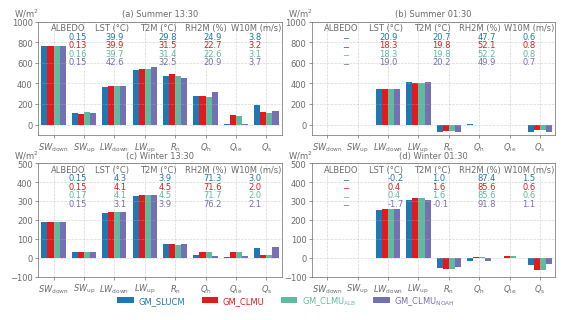

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(5.5, 3))
ax = axes.flatten()

for i in range(4):
    time_i = tag_list[i%2]
    df_j = df_flux[df_flux['tag'] == time_i]
    sel_location = i // 2
    season = season_list[sel_location]
    df_i = df_j[df_j['season'] == season]
    n_models = len(model_list)
    for j, model in enumerate(model_list):
        df_model = df_i[df_i['model'] == model]
        values = df_model[vars_to_plot].values.flatten()
        x = range(len(vars_to_plot))
        bar_pos = [val + (j - (n_models - 1)/2)*bar_width for val in x]  # slight offset between models
        bar_pos = [val + start for val in bar_pos]  # slight offset between models
        ax[i].bar(bar_pos, values, width=bar_width, label=label_list[j], color=lc[j], alpha=alpha_list[j])
        if (time_i =='01:30'):
            text_albedo = r'$-$'
        else:
            text_albedo = np.round(df_model['ALBEDO'].item(), 2) 
        y = j+1 
        if i in [0,1]:
            xoffset2 = 0.15
        else:
            xoffset2 = xoffset
        ax[i].text(xloc_2, yloc - y*yoffset, text_albedo, alpha = alpha_list[j],
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc_2+ xoffset2, yloc - y*yoffset, np.round(df_model['TSK'].item()-273.15,1),alpha = alpha_list[j],
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc_2+ xoffset*2, yloc - y*yoffset, np.round(df_model['T2'].item()-273.15,1),alpha = alpha_list[j],
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc_2+ xoffset*3, yloc - y*yoffset, np.round(df_model['RH2M'].item(),1),alpha = alpha_list[j],
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc_2+ xoffset*4, yloc - y*yoffset, np.round(df_model['W10M'].item(),1),alpha = alpha_list[j],
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].set_xticks(xticks)
    ax[i].set_xlim(min(bar_pos) - n_models* bar_width, max(bar_pos) + bar_width)
    ax[i].set_xticklabels(xticks_list, fontsize=fontsize)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i]}', fontsize=labelsize, color=labelcolor, pad=padding)
    if season == 'winter':
        ymax = 500
    else:
        ymax = 1000  
    ax[i].set_ylim(-100, ymax)
    ax[i].set_ylabel('W/$\mathrm{m}^2$', fontsize=fontsize, color=labelcolor, rotation=0, ha='center', labelpad=2.5)
    ax[i].yaxis.set_label_coords(-0.05, 1.0225)  
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,
                      labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,
                      labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].grid(True,linestyle='--',linewidth=linewidth, alpha=0.5)
    ax[i].text(xloc, yloc, 'ALBEDO', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc + xoffset, yloc, 'LST (°C)', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc + xoffset*2, yloc, 'T2M (°C)', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc+ xoffset*3, yloc, 'RH2M (%)', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc+ xoffset*4, yloc, 'W10M (m/s)', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.025), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=5)
for i, text in enumerate(legend.get_texts()):
    text.set_color(lc[i])
    text.set_alpha(alpha_list[i])
plt.subplots_adjust(left=0.05, right=0.99, bottom=0.1, top=0.95, wspace=0.125, hspace=0.25) 
plt.savefig('sensitivity_flux.png', dpi=300)
plt.savefig('sensitivity_flux.pdf', dpi=600)

# Description

In [3]:
df_flux_wrf = df_flux[df_flux['model'] == 'wrf']
df_flux_wrf

,tag,model,location,season,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,...,PSFC,SWUP,LWUP,LWDOWN,netLW,NET,AHF,W10M,RH2M,GRD
0,01:30,wrf,sp,summer,0.000000,350.552872,2.946615,-0.038948,0.018000,0.98,...,101627.517578,0.000000,415.419271,343.541821,-71.877450,-71.877450,0.0,0.645768,47.709363,-74.785118
1,01:30,wrf,sp,winter,0.000000,259.196594,-16.751774,0.162213,0.018000,0.98,...,100386.843750,0.000000,308.372868,254.012667,-54.360200,-54.360200,0.0,1.489435,87.392488,-37.770640
8,13:30,wrf,sp,summer,759.691040,370.210983,279.180534,2.531059,0.154772,0.98,...,101321.359375,117.579169,533.919043,362.806771,-171.112272,470.999598,0.0,3.768751,24.866259,189.288005
9,13:30,wrf,sp,winter,190.664368,244.446289,14.441679,3.621580,0.154772,0.98,...,100434.799479,29.509574,329.453963,239.557368,-89.896595,71.258198,0.0,2.974778,71.320903,53.194939


In [4]:
df_flux_wrf_day_sp = df_flux_wrf[(df_flux_wrf['tag'] == '13:30') & (df_flux_wrf['location'] == 'sp')]
print(np.round(100*df_flux_wrf_day_sp['HFX'] / df_flux_wrf_day_sp['NET'],1),
      np.round(100*df_flux_wrf_day_sp['LH'] / df_flux_wrf_day_sp['NET'],1),
      np.round(100*df_flux_wrf_day_sp['GRD'] / df_flux_wrf_day_sp['NET'],1))

8    59.3
9    20.3
dtype: float64 8    0.5
9    5.1
dtype: float64 8    40.2
9    74.7
dtype: float64


In [5]:
df_flux[(df_flux['tag']=='13:30') & (df_flux['location']=='sp')][['model', 'T2', 'TSK']]

,model,T2,TSK
8,wrf,302.953949,313.088104
9,wrf,277.018311,277.489400
10,wrf-ctsm,304.631134,313.058853
11,wrf-ctsm,277.623149,277.229085
12,wrf-ctsm_road_albedo,304.596207,312.852814
13,wrf-ctsm_road_albedo,277.621552,277.200124
14,wrf-ctsm_uniform_urban,305.641533,315.771225
15,wrf-ctsm_uniform_urban,277.005707,276.203542


In [6]:
df_flux_day_sp = df_flux[(df_flux['tag']=='13:30') & (df_flux['location']=='sp')]
df_flux_day_sp

,tag,model,location,season,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,...,PSFC,SWUP,LWUP,LWDOWN,netLW,NET,AHF,W10M,RH2M,GRD
8,13:30,wrf,sp,summer,759.691040,370.210983,279.180534,2.531059,0.154772,0.98,...,101321.359375,117.579169,533.919043,362.806771,-171.112272,470.999598,0.000000,3.768751,24.866259,189.288005
9,13:30,wrf,sp,winter,190.664368,244.446289,14.441679,3.621580,0.154772,0.98,...,100434.799479,29.509574,329.453963,239.557368,-89.896595,71.258198,0.000000,2.974778,71.320903,53.194939
10,13:30,wrf-ctsm,sp,summer,763.619705,371.351341,276.730949,93.419388,0.132765,1.00,...,101314.542969,101.382140,544.611765,371.351341,-173.260423,488.977142,0.000000,3.161051,22.666465,118.826805
11,13:30,wrf-ctsm,sp,winter,190.736069,243.985952,29.142292,31.936752,0.153720,1.00,...,100437.500000,29.319945,334.917798,243.985952,-90.931846,70.484278,5.131047,2.041427,71.628255,14.536281
12,13:30,wrf-ctsm_road_albedo,sp,summer,765.282883,371.287956,272.852745,80.944356,0.160320,1.00,...,101315.050781,122.690080,543.179436,371.287956,-171.891480,470.701323,0.000000,3.149077,22.637994,116.904222
13,13:30,wrf-ctsm_road_albedo,sp,winter,190.646886,243.661814,28.440496,30.709464,0.166259,1.00,...,100437.390625,31.696696,334.777869,243.661814,-91.116054,67.834135,5.124968,2.019392,71.676409,13.809144
14,13:30,wrf-ctsm_uniform_urban,sp,summer,762.045609,371.672386,316.185867,8.459405,0.149320,1.00,...,101312.580078,113.788695,563.732751,371.672386,-192.060365,456.196549,0.000000,3.703984,20.903785,131.551277
15,13:30,wrf-ctsm_uniform_urban,sp,winter,189.499873,244.834086,6.767841,10.456766,0.152406,1.00,...,100438.044271,28.880911,329.989434,244.834086,-85.155348,75.463614,0.000000,2.142364,76.216850,58.239006


In [7]:
df_flux_day_sp['NET']

8     470.999598
9      71.258198
10    488.977142
11     70.484278
12    470.701323
13     67.834135
14    456.196549
15     75.463614
Name: NET, dtype: float64

In [8]:
df_flux_night_sp = df_flux[(df_flux['tag']=='01:30') & (df_flux['location']=='sp')]
df_flux_night_sp

,tag,model,location,season,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,...,PSFC,SWUP,LWUP,LWDOWN,netLW,NET,AHF,W10M,RH2M,GRD
0,01:30,wrf,sp,summer,0.0,350.552872,2.946615,-0.038948,0.018,0.98,...,101627.517578,0.0,415.419271,343.541821,-71.877450,-71.877450,0.000000,0.645768,47.709363,-74.785118
1,01:30,wrf,sp,winter,0.0,259.196594,-16.751774,0.162213,0.018,0.98,...,100386.843750,0.0,308.372868,254.012667,-54.360200,-54.360200,0.000000,1.489435,87.392488,-37.770640
2,01:30,wrf-ctsm,sp,summer,0.0,347.329132,-5.905338,0.274503,0.300,1.00,...,101632.197266,0.0,409.267839,347.329132,-61.938707,-61.938707,0.000000,0.787207,52.112415,-56.307873
3,01:30,wrf-ctsm,sp,winter,0.0,259.871821,1.757423,8.011357,0.300,1.00,...,100385.346354,0.0,317.648946,259.871821,-57.777125,-57.777125,5.087344,0.637025,85.576016,-62.458562
4,01:30,wrf-ctsm_road_albedo,sp,summer,0.0,347.611404,-5.893152,0.275079,0.300,1.00,...,101632.257812,0.0,409.170493,347.611404,-61.559088,-61.559088,0.000000,0.788793,52.192223,-55.941015
5,01:30,wrf-ctsm_road_albedo,sp,winter,0.0,259.725667,1.653929,7.993065,0.300,1.00,...,100385.364583,0.0,317.600760,259.725667,-57.875093,-57.875093,5.088002,0.638749,85.569523,-62.434086
6,01:30,wrf-ctsm_uniform_urban,sp,summer,0.0,346.945801,1.525779,0.434242,0.300,1.00,...,101632.505859,0.0,413.200312,346.945801,-66.254511,-66.254511,0.000000,0.740698,49.906203,-68.214532
7,01:30,wrf-ctsm_uniform_urban,sp,winter,0.0,257.953135,-15.398008,-1.721585,0.300,1.00,...,100388.356771,0.0,308.024963,257.953135,-50.071828,-50.071828,0.000000,1.050911,91.751025,-32.952234


In [5]:
df_flux_sel = df_flux[df_flux['model'].isin(['wrf', 'wrf-ctsm_uniform_urban'])].copy()
flux_variable = ['SWDOWN', 'SWUP', 'LWDOWN', 'LWUP', 'netLW', 'HFX', 'LH', 'GRD']
df_flux_sel_summer = df_flux_sel[df_flux_sel['season']=='summer']
df_flux_sel_summer[flux_variable]

,SWDOWN,SWUP,LWDOWN,LWUP,netLW,HFX,LH,GRD
0,0.000000,0.000000,343.541821,415.419271,-71.877450,2.946615,-0.038948,-74.785118
6,0.000000,0.000000,346.945801,413.200312,-66.254511,1.525779,0.434242,-68.214532
8,759.691040,117.579169,362.806771,533.919043,-171.112272,279.180534,2.531059,189.288005
14,762.045609,113.788695,371.672386,563.732751,-192.060365,316.185867,8.459405,131.551277


In [7]:
df_flux_sel = df_flux[df_flux['model'].isin(['wrf', 'wrf-ctsm_uniform_urban'])].copy()
df_flux_sel_winter = df_flux_sel[df_flux_sel['season']=='winter']
flux_variable = ['SWDOWN', 'SWUP', 'LWDOWN', 'LWUP', 'netLW', 'HFX', 'LH', 'GRD', 'TSK', 'EMISS']
df_flux_sel_winter[flux_variable]

,SWDOWN,SWUP,LWDOWN,LWUP,netLW,HFX,LH,GRD,TSK,EMISS
1,0.000000,0.000000,254.012667,308.372868,-54.360200,-16.751774,0.162213,-37.770640,272.939728,0.98
7,0.000000,0.000000,257.953135,308.024963,-50.071828,-15.398008,-1.721585,-32.952234,271.488047,1.00
9,190.664368,29.509574,239.557368,329.453963,-89.896595,14.441679,3.621580,53.194939,277.489400,0.98
15,189.499873,28.880911,244.834086,329.989434,-85.155348,6.767841,10.456766,58.239006,276.203542,1.00
